In [31]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import trompy as tp

In [32]:
# read in data
PATH_TO_WORKBOOK = Path("C:/Users/jmc010/UiT Office 365/O365-Pipette 2 - Documents/People/Marije")
EXCEL_WORKBOOK = "measurements_b3_1.xlsx"
rows, header = tp.metafilereader(PATH_TO_WORKBOOK / EXCEL_WORKBOOK, sheetname="metafile_niacin")


# how about a google drive but that we save a csv file for every day

In [33]:
def get_value(row):
    if row['sex'] == 'female' and row['group'] == 'control':
        return 0
    elif row['sex'] == 'female' and row['group'] == 'experimental':
        return 1
    elif row['sex'] == 'male' and row['group'] == 'control':
        return 2
    elif row['sex'] == 'male' and row['group'] == 'experimental':
        return 3
    else:
        return -1

def tweak_df(df):
    
    return (df
            # .query("bodyweight != ''")
            .query("bodyweight.notna()", engine="python")
            .astype({"sex": "category",
                     "group": "category",
                     "diet": "category",
                     "bodyweight": float,
                     "food_yesterday": float,
                     "food_intake": float,
                     "water_intake": float
                     }
                    )
             .assign(groupn = lambda df_: df_.apply(get_value, axis=1))
            )
    
df = tweak_df(pd.DataFrame(rows, columns=header))

In [34]:
df.dtypes

animal_id            object
sex                category
group              category
diet               category
date                 object
niacin              float64
bodyweight          float64
food_yesterday      float64
food_today          float64
food_intake         float64
water_yesterday     float64
water_today          object
water_intake        float64
groupn                int64
dtype: object

In [35]:
df.columns

Index(['animal_id', 'sex', 'group', 'diet', 'date', 'niacin', 'bodyweight',
       'food_yesterday', 'food_today', 'food_intake', 'water_yesterday',
       'water_today', 'water_intake', 'groupn'],
      dtype='object')

In [36]:
df.animal_id.unique()
df.date.unique()

array(['2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15',
       '2024-02-16', '2024-02-17', '2024-02-18', '2024-02-19',
       '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23',
       '2024-02-24', '2024-02-25', '2024-02-26', '2024-02-27',
       '2024-02-28'], dtype=object)

In [37]:
df.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()

,sex,group,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_intake,groupn
0,female,control,2024-02-12,0.0,20.4125,-1.0000,77.4500,-1.0000,-1.0000,-1.0000,0.0
1,female,control,2024-02-13,0.0,19.9375,77.4500,74.5625,2.8875,51.5000,9.0125,0.0
2,female,control,2024-02-14,0.0,20.0625,74.5625,71.6250,2.9375,51.2875,3.0625,0.0
3,female,control,2024-02-15,0.0,20.0875,71.6250,68.6375,2.9875,51.5250,3.0000,0.0
4,female,control,2024-02-16,0.0,20.2125,72.7875,69.4250,3.3625,51.7500,3.1500,0.0
...,...,...,...,...,...,...,...,...,...,...,...
63,male,experimental,2024-02-24,15.0,26.0625,45.8750,42.5625,3.3125,49.0750,2.9000,3.0
64,male,experimental,2024-02-25,15.0,25.8500,42.5625,39.8625,2.7000,46.1750,2.9875,3.0
65,male,experimental,2024-02-26,7.5,25.4125,39.8625,37.2750,2.5875,51.1000,2.5750,3.0
66,male,experimental,2024-02-27,7.5,26.3625,37.2750,34.2750,3.0000,48.5250,2.7375,3.0


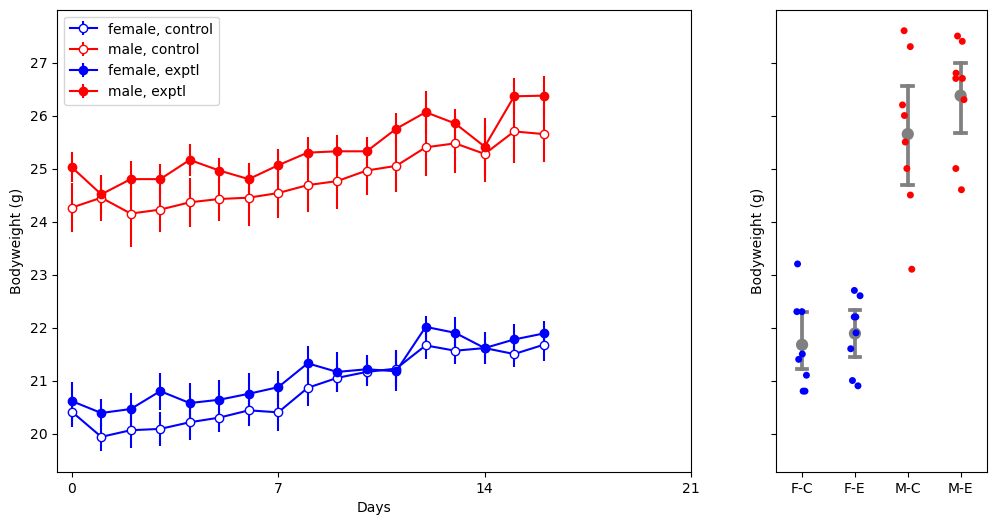

In [38]:
# Find mean and SEM of all data
mean = df.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem = df.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4))

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean.query("sex == 'female' and group == 'control'").bodyweight,
               yerr=sem.query("sex == 'female' and group == 'control'").bodyweight,
               marker="o", markerfacecolor="white", color="blue",
               label="female, control"
                )

ax[0].errorbar(x,
               mean.query("sex == 'male' and group == 'control'").bodyweight,
               yerr=sem.query("sex == 'male' and group == 'control'").bodyweight,
               marker="o", markerfacecolor="white", color="red",
               label="male, control")

ax[0].errorbar(x,
               mean.query("sex == 'female' and group == 'experimental'").bodyweight,
               yerr=sem.query("sex == 'female' and group == 'experimental'").bodyweight,
               marker="o", markerfacecolor="blue", color="blue",
               label="female, exptl")

ax[0].errorbar(x,
               mean.query("sex == 'male' and group == 'experimental'").bodyweight,
               yerr=sem.query("sex == 'male' and group == 'experimental'").bodyweight,
               marker="o", markerfacecolor="red", color="red",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,21])
ax[0].set_xticks([0,7,14,21])

# Add labels
ax[0].set_ylabel("Bodyweight (g)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["blue", "blue", "red", "red"]

sns.stripplot(data=today_df, x="groupn", y="bodyweight", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='bodyweight', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Bodyweight (g)")
ax[1].legend().remove()

In [39]:
today_df

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
512,B3101,male,control,control,2024-02-28,0.0,23.1,49.3,47.0,2.3,40.3,37.8,2.5,2
513,B3102,male,control,control,2024-02-28,0.0,25.0,47.8,45.3,2.5,50.8,48.5,2.3,2
514,B3103,male,experimental,experimental,2024-02-28,7.5,24.6,40.1,37.3,2.8,45.6,43.1,2.5,3
515,B3104,male,experimental,experimental,2024-02-28,7.5,27.5,64.4,61.2,3.2,46.8,44.3,2.5,3
516,B3105,male,control,control,2024-02-28,0.0,27.3,43.0,40.6,2.4,51.5,49.1,2.4,2
517,B3106,male,control,control,2024-02-28,0.0,27.6,39.6,36.6,3.0,50.9,48.5,2.4,2
518,B3107,male,experimental,experimental,2024-02-28,7.5,26.7,57.3,54.3,3.0,46.1,43.6,2.5,3
519,B3108,male,experimental,experimental,2024-02-28,7.5,26.3,57.4,55.0,2.4,46.4,44.4,2.0,3
520,B3109,male,control,control,2024-02-28,0.0,26.0,39.0,36.2,2.8,52.0,49.7,2.3,2
521,B3110,male,control,control,2024-02-28,0.0,26.2,37.1,34.7,2.4,50.9,49.1,1.8,2


In [40]:
today

'2024-02-28'

In [41]:
df.head()

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
0,B3101,male,control,control,2024-02-12,0.0,21.8,-1.0,60.7,-1.0,-1.0,50.9,-1.0,2
1,B3102,male,control,control,2024-02-12,0.0,24.7,-1.0,56.0,-1.0,-1.0,50.4,-1.0,2
2,B3103,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
3,B3104,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
4,B3105,male,control,control,2024-02-12,0.0,25.4,-1.0,56.3,-1.0,-1.0,50.9,-1.0,2


In [42]:
# Food intake figure

# Clean up df

def remove_and_clean(df):
    """Removes unecessary rows and cleans data to get rid of erroneous values.

    Args:
        df (Pandas dataframe): Contains data from niacin experiment

    Returns:
        Dataframe: Cleaned dataframe
    """
    return (df
            .query("food_yesterday != -1.0")
            
            .assign(food_intake = lambda df_: [x if x > 1 else np.nan for x in df_.food_intake])
            .assign(food_intake = lambda df_: [x if x < df_.food_intake.mean()*3 else np.nan for x in df_.food_intake])
            .assign(food_intake = lambda df_: [x if not np.isnan(x) else df_.food_intake.mean() for x in df_.food_intake])
            .assign(water_intake = lambda df_: [x if x > 1 else np.nan for x in df_.water_intake])
            .assign(water_intake = lambda df_: [x if x < df_.water_intake.mean()*2 else np.nan for x in df_.water_intake])
            .assign(water_intake = lambda df_: [x if not np.isnan(x) else df_.water_intake.mean() for x in df_.water_intake])
    )

df_food_water = remove_and_clean(df)


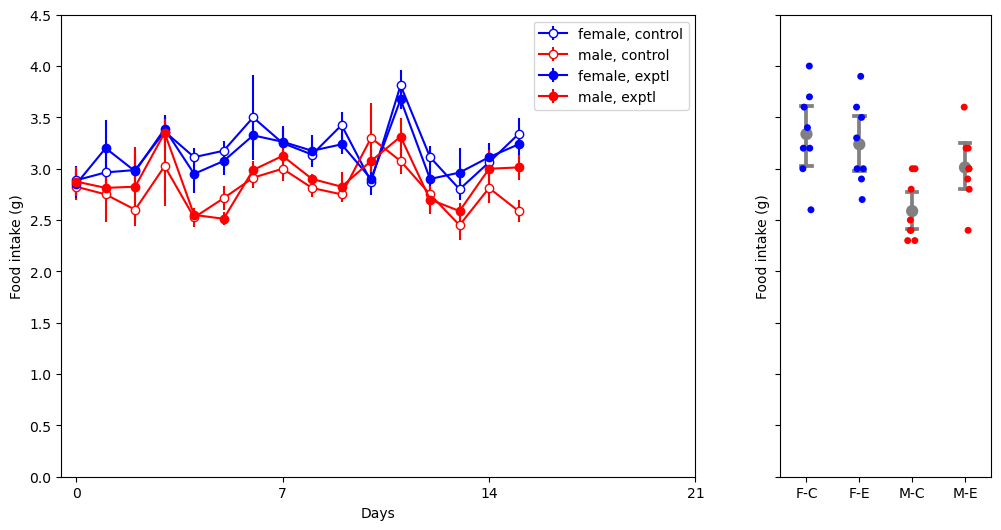

In [46]:
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4) - 1)

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'control'").food_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'control'").food_intake,
               marker="o", markerfacecolor="white", color="blue",
               label="female, control"
                )

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'control'").food_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'control'").food_intake,
               marker="o", markerfacecolor="white", color="red",
               label="male, control")

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'experimental'").food_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").food_intake,
               marker="o", markerfacecolor="blue", color="blue",
               label="female, exptl")

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'experimental'").food_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").food_intake,
               marker="o", markerfacecolor="red", color="red",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,21])
ax[0].set_xticks([0,7,14,21])

ax[0].set_ylim([0,4.5])

# Add labels
ax[0].set_ylabel("Food intake (g)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["blue", "blue", "red", "red"]

sns.stripplot(data=today_df, x="groupn", y="food_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='food_intake', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Food intake (g)")
ax[1].legend().remove()


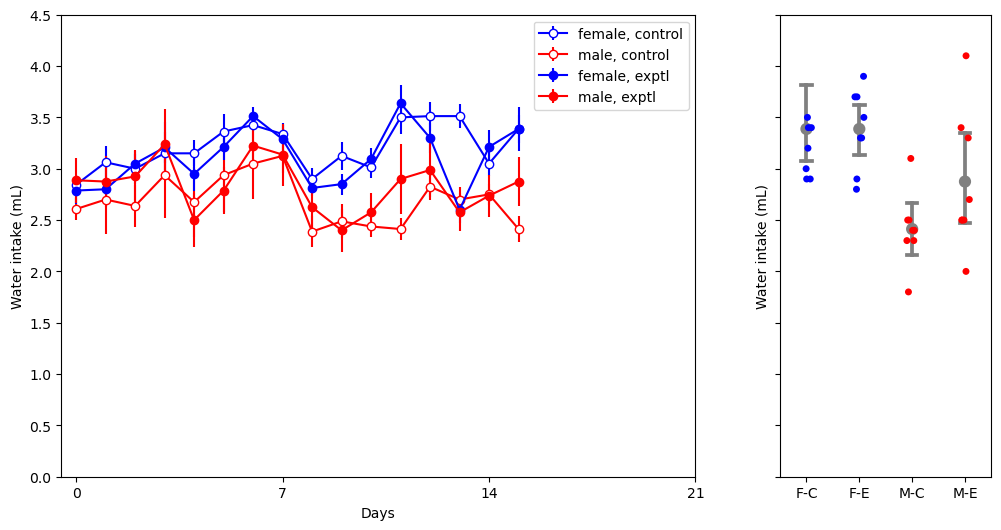

In [45]:
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4) - 1)

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'control'").water_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'control'").water_intake,
               marker="o", markerfacecolor="white", color="blue",
               label="female, control"
                )

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'control'").water_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'control'").water_intake,
               marker="o", markerfacecolor="white", color="red",
               label="male, control")

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'experimental'").water_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").water_intake,
               marker="o", markerfacecolor="blue", color="blue",
               label="female, exptl")

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'experimental'").water_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").water_intake,
               marker="o", markerfacecolor="red", color="red",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,21])
ax[0].set_xticks([0,7,14,21])

ax[0].set_ylim([0,4.5])

# Add labels
ax[0].set_ylabel("Water intake (mL)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["blue", "blue", "red", "red"]

sns.stripplot(data=today_df, x="groupn", y="water_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='water_intake', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Water intake (mL)")
ax[1].legend().remove()


In [30]:
mean_fw.query("sex == 'female' and group == 'control'").water_intake
sem_fw.query("sex == 'female' and group == 'control'").water_intake

0     0.076565
1     0.155767
2     0.147600
3     0.098198
4     0.126773
5     0.170018
6     0.045316
7     0.086474
8     0.105221
9     0.135949
10    0.102535
11    0.161466
12    0.141973
13    0.120175
14    0.118019
15    0.000000
Name: water_intake, dtype: float64

In [18]:
today_df

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
512,B3101,male,control,control,2024-02-28,0.0,23.1,49.3,47.0,2.3,40.3,37.8,NaN,2
513,B3102,male,control,control,2024-02-28,0.0,25.0,47.8,45.3,2.5,50.8,48.5,NaN,2
514,B3103,male,experimental,experimental,2024-02-28,7.5,24.6,40.1,37.3,2.8,45.6,43.1,NaN,3
515,B3104,male,experimental,experimental,2024-02-28,7.5,27.5,64.4,61.2,3.2,46.8,44.3,NaN,3
516,B3105,male,control,control,2024-02-28,0.0,27.3,43.0,40.6,2.4,51.5,49.1,NaN,2
517,B3106,male,control,control,2024-02-28,0.0,27.6,39.6,36.6,3.0,50.9,48.5,NaN,2
518,B3107,male,experimental,experimental,2024-02-28,7.5,26.7,57.3,54.3,3.0,46.1,43.6,NaN,3
519,B3108,male,experimental,experimental,2024-02-28,7.5,26.3,57.4,55.0,2.4,46.4,44.4,NaN,3
520,B3109,male,control,control,2024-02-28,0.0,26.0,39.0,36.2,2.8,52.0,49.7,NaN,2
521,B3110,male,control,control,2024-02-28,0.0,26.2,37.1,34.7,2.4,50.9,49.1,NaN,2


In [ ]:
# List of figures

# body weight graphs
# body weight of CON vs ND, male vs female
# bar graph and daily line graph
# most recent day change from last 3 days? (barscatter)


# food intake



# niacin concentration



#individual mice showing all on one graph